# PCA

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score



In [2]:
df = pd.read_csv("/Users/tingjue/170 project/cars ml.csv",index_col=0)

In [7]:
df

,id,price,year,avg_rating,count,condition,cylinders,odometer,lstm_feature,bilstm_feature,...,automatic,manual,other transmission,4wd,fwd,rwd,color_encode,location_encode,manufacturer_encode,model_encode
0,0,17899,2012.0,4.600694,36.0,4,3,63500.0,18198.558594,27333.046875,...,0,1,0,1,0,0,0.195737,0.001836,9435.071384,0.002136
1,4398,9891,2012.0,4.600694,36.0,4,3,89419.0,16551.052734,16830.625000,...,1,0,0,0,1,0,0.233790,0.002253,9435.071384,0.002136
2,23723,7995,2012.0,4.600694,36.0,3,4,41600.0,12009.676758,9721.872070,...,1,0,0,0,1,0,0.123321,0.008228,9435.071384,0.002136
3,25205,12900,2012.0,4.600694,36.0,4,3,68073.0,19342.486328,11827.651367,...,1,0,0,0,1,0,0.100272,0.008261,9435.071384,0.002136
4,33832,21270,2012.0,4.600694,36.0,4,3,53169.0,20155.263672,12482.712891,...,1,0,0,1,0,0,0.100272,0.007460,9435.071384,0.002136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59912,82308,9995,2006.0,4.305556,72.0,3,7,103964.0,8014.783691,6944.399414,...,1,0,0,1,0,0,0.123321,0.006058,9435.071384,0.001051
59913,82426,2200,2003.0,4.259615,52.0,3,3,148000.0,4135.699707,4890.686035,...,0,1,0,0,1,0,0.233790,0.000300,9475.466321,0.002737
59914,82576,12900,2009.0,4.357143,7.0,4,5,115950.0,14413.969727,12452.664062,...,1,0,0,0,0,1,0.100272,0.003572,12606.055029,0.006693
59915,82653,2000,2001.0,3.842391,69.0,4,3,75000.0,7259.627441,5160.313477,...,1,0,0,0,1,0,0.233790,0.003572,8175.546485,0.000584


In [3]:
x=df.drop('price',axis=1).drop('id',axis=1)
y=df['price']

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True)

scaler = MinMaxScaler()
xtr = scaler.fit_transform(xtr)
xte = scaler.transform(xte)

x = scaler.fit_transform(x)


In [9]:
pd.set_option('display.max_columns', None)
x

,year,avg_rating,count,condition,cylinders,odometer,lstm_feature,bilstm_feature,gru_feature,cnn_feature,fast_feature,diesel,electric,gas,hybrid,other fuel,title_status_encode,automatic,manual,other transmission,4wd,fwd,rwd,color_encode,location_encode,manufacturer_encode,model_encode
0,2012.0,4.600694,36.0,4,3,63500.0,18198.558594,27333.046875,22720.089844,23409.597656,21392.708984,0,0,1,0,0,0.957608,0,1,0,1,0,0,0.195737,0.001836,9435.071384,0.002136
1,2012.0,4.600694,36.0,4,3,89419.0,16551.052734,16830.625000,15969.620117,13576.520508,15707.687500,1,0,0,0,0,0.957608,1,0,0,0,1,0,0.233790,0.002253,9435.071384,0.002136
2,2012.0,4.600694,36.0,3,4,41600.0,12009.676758,9721.872070,11588.109375,6487.177734,5450.783203,0,0,1,0,0,0.957608,1,0,0,0,1,0,0.123321,0.008228,9435.071384,0.002136
3,2012.0,4.600694,36.0,4,3,68073.0,19342.486328,11827.651367,14768.078125,16006.382812,15344.616211,1,0,0,0,0,0.957608,1,0,0,0,1,0,0.100272,0.008261,9435.071384,0.002136
4,2012.0,4.600694,36.0,4,3,53169.0,20155.263672,12482.712891,18049.710938,15435.342773,14372.857422,0,0,1,0,0,0.957608,1,0,0,1,0,0,0.100272,0.007460,9435.071384,0.002136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59912,2006.0,4.305556,72.0,3,7,103964.0,8014.783691,6944.399414,11832.634766,6348.051270,8534.781250,1,0,0,0,0,0.957608,1,0,0,1,0,0,0.123321,0.006058,9435.071384,0.001051
59913,2003.0,4.259615,52.0,3,3,148000.0,4135.699707,4890.686035,5598.274414,2871.909424,3641.207520,0,0,1,0,0,0.957608,0,1,0,0,1,0,0.233790,0.000300,9475.466321,0.002737
59914,2009.0,4.357143,7.0,4,5,115950.0,14413.969727,12452.664062,10286.337891,12750.390625,11489.996094,0,0,1,0,0,0.957608,1,0,0,0,0,1,0.100272,0.003572,12606.055029,0.006693
59915,2001.0,3.842391,69.0,4,3,75000.0,7259.627441,5160.313477,4470.877930,10385.222656,5719.744629,0,0,0,0,1,0.957608,1,0,0,0,1,0,0.233790,0.003572,8175.546485,0.000584


In [4]:
x = scaler.fit_transform(x)

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=19)
X_train = pca.fit_transform(xtr)
X_test = pca.transform(xte)
x1 = pca.fit_transform(x)
variance = pca.explained_variance_ratio_

In [23]:
set(variance)

array([3.10538307e-01, 1.48782934e-01, 9.34064705e-02, 8.89445154e-02,
       5.90672409e-02, 4.83479735e-02, 4.55704344e-02, 4.21182028e-02,
       2.96742015e-02, 2.76112326e-02, 1.86688983e-02, 1.63615184e-02,
       1.50766650e-02, 1.22302017e-02, 1.09348376e-02, 9.71342933e-03,
       7.55859284e-03, 6.90165717e-03, 4.34606108e-03, 1.47035816e-03,
       9.68683386e-04, 6.67131179e-04, 6.59537189e-04, 3.80915822e-04,
       6.12428825e-32, 1.46332379e-32, 5.36710497e-33])

Text(0, 0.5, 'Variance')

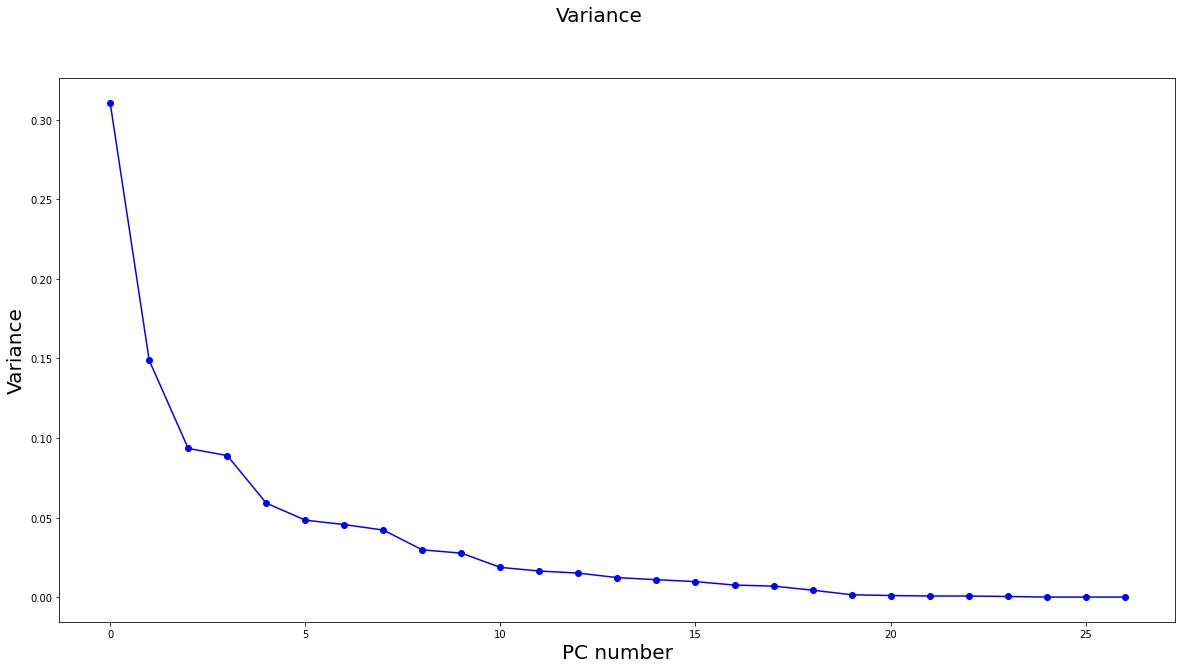

In [31]:
plt.figure(figsize=(20,10))
plt.plot(variance,marker='o', color='b')
plt.suptitle('Variance',fontsize=20)
plt.xlabel('PC number',fontsize=20)
plt.ylabel('Variance',fontsize=20)

In [32]:
pca = PCA(n_components=19)
xtr1 = pca.fit_transform(xtr)
xte1 = pca.transform(xte)
model = LinearRegression()
result = model.fit(xtr1, ytr)
y_pred = model.predict(xte1)
print(r2_score(yte,y_pred))
print(metrics.mean_absolute_error(yte, y_pred))

0.7369142614741714
3386.8460849774647
